# Off-Facebook Activity

In [1]:
import pandas as pd
import json5 as js
import matplotlib.pyplot as plt

In [2]:
with open(r'facebook_data/apps_and_websites_off_of_facebook/your_off-facebook_activity.json') as data:
    face_data = js.load(data)

### Website Hypothesis
It has been a very long time since I have used Facebook. I was probably most active in Middle School, so I do not have much of a clue as to what is going to be within my data. A guess would be that the most occurring websites will be those that were related to memes or funny articles. This could be a image hosting site like imgur or something else.

In [3]:
off_face_df = pd.DataFrame(face_data['off_facebook_activity_v2'])
off_face_df.head()

,name,events
0,Bed Bath & Beyond,"[{'id': 770451887120218, 'type': 'PURCHASE', '..."
1,hiram.edu,"[{'id': 895019837288746, 'type': 'PAGE_VIEW', ..."
2,Coinbase,"[{'id': 379670032410722, 'type': 'INITIATE_CHE..."
3,Ulta Beauty,"[{'id': 2745743779073743, 'type': 'CUSTOM', 't..."
4,benttreecoffee.com,"[{'id': 2306745339602657, 'type': 'PAGE_VIEW',..."


In [4]:
name_count = off_face_df.groupby('name').count()
name_count

,events
name,
4front,1
Advance Auto Parts,1
Airbnb,1
Bed Bath & Beyond,1
Bethesda Softworks,1
...,...
ups.com,1
vulture.com,1
waste360.com,1


The events key represents the number of times that I visited these sites through facebook, or rather those websites I visited that Facebook was able to track me through. This will allow me to get what I need because I can now create a distribution of this column.

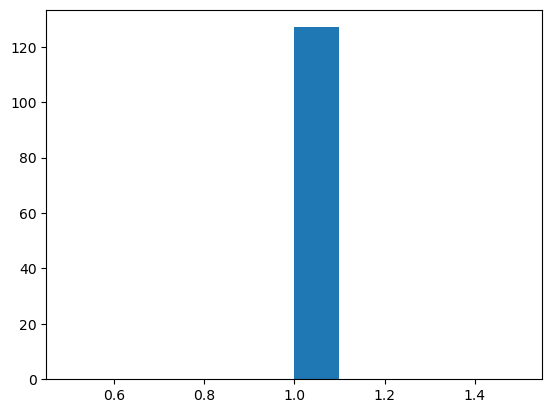

In [5]:
ax, fig = plt.subplots()
fig.hist(name_count['events'])
plt.show()

So, there is not much to conclude from this histogram other than my data is not well structured for this activity. I examined the entirety of the events column using the max() function, and found that there is only one record for each of the entries. One interesting finding when examining the data is the following entry:

In [6]:
name_count[name_count.index == 'rdocumentation.org']

,events
name,
rdocumentation.org,1


I do not recall anytime where I was viewing any content related to R through the Facebook app. This does show insight that this account may not have been the same account as I thought. I must have gotten a new account somewhere between Middle School and now because the data is so small, and because I did not use R until College.

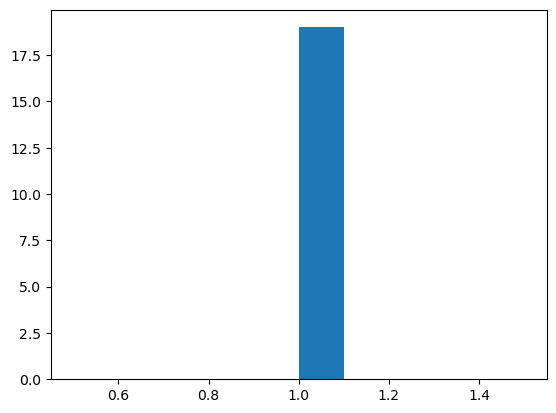

In [7]:
sort_count = name_count.sort_values('events')
ax, fig = plt.subplots()
fig.hist(sort_count['events'][1:20])
plt.show()

The code above would result in a histogram of the top 20 most visited websites; however, as mentioned before my data is not sufficient for an analysis. Regardless, Facebook would conclude that I am not a very good subject for any marketing analysis or community clustering with my friends. I do not think this would mean that Facebook would completely disregard my account or those like mine. Most likely, there would be some kind of customer retention effort to try and keep me on the platform more often and for longer periods at a time.

Facebook's conclusion that I would need to be a target for a customer retention effort would be accurate, but may not pay out in the long run. There is some balance between paying to attempt to retain customers, and just letting those customers who are lost causes go. Given how big Facebook is, it is not likely they let many customers go freely. 

# Album Analysis

In [8]:
import base64
import requests

### Authentication Code

In [9]:
keys = pd.read_csv("../Spotify/tokens", header = 0, sep = ",")
id = keys["Client_ID"][0]
secret = keys["Client_Secret"][0]
client_cred = base64.b64encode(str(id + ":" + secret).encode('ascii'))
header = {'Authorization': 'Basic {}'.format(client_cred.decode('ascii'))}
payload = {'grant_type' : 'client_credentials'}
access_token_url = "https://accounts.spotify.com/api/token"
response = requests.post(access_token_url, headers = header, data = payload)
session_token = response.json()['access_token']
session_header = {'Authorization': 'Bearer {}'.format(response.json()['access_token'])}

The below three albums are Punisher by Phoebe Bridges, Happier than ever by Billie Eilish, and Hopeless Fountain Kingdom by Halsey. These three albums are ones from artists who I have listened to a lot, and I am interested in comparing their work. 

Billie Eilish has a large range within her genre, Phoebe Bridgers has more consistent work, and Halsey varies some. They are all from similar genres, but I think that I will be able to find some dimensions that are different in their work.

In [10]:
punisher = '6Pp6qGEywDdofgFC1oFbSH'
happier_than_ever = '0JGOiO34nwfUdDrD612dOp'
hopeless_fountain_kingdom = '1o8ExR66PcMb1h8a1nhi9k'

### Defining Endpoints for Retrieving Track Data

In [11]:
pb_endpoint = "https://api.spotify.com/v1/albums/{}/tracks".format(punisher)
pb_tracks = requests.get(pb_endpoint, headers = session_header)
print(pb_tracks.status_code)
be_endpoint = "https://api.spotify.com/v1/albums/{}/tracks".format(happier_than_ever)
be_tracks = requests.get(be_endpoint, headers = session_header)
print(be_tracks.status_code)
h_endpoint = "https://api.spotify.com/v1/albums/{}/tracks".format(hopeless_fountain_kingdom)
h_tracks = requests.get(h_endpoint, headers = session_header)
print(h_tracks.status_code)

200
200
200


### Parsing to Dictionary

In [12]:
pb_dict = js.loads(pb_tracks.text)
pb_track_ids = [x['id'] for x in pb_dict['items']]
be_dict = js.loads(be_tracks.text)
be_track_ids = [x['id'] for x in be_dict['items']]
h_dict = js.loads(h_tracks.text)
h_track_ids = [x['id'] for x in h_dict['items']]

### Defining Endpoints for Retrieving Audio Feature Data

In [13]:
pb_features_endpoint = "https://api.spotify.com/v1/audio-features?ids={}".format(','.join(str(x) for x in pb_track_ids))
pb_features = requests.get(pb_features_endpoint, headers = session_header)
print(pb_features.status_code)
be_features_endpoint = "https://api.spotify.com/v1/audio-features?ids={}".format(','.join(str(x) for x in be_track_ids))
be_features = requests.get(be_features_endpoint, headers = session_header)
print(pb_features.status_code)
h_features_endpoint = "https://api.spotify.com/v1/audio-features?ids={}".format(','.join(str(x) for x in h_track_ids))
h_features = requests.get(h_features_endpoint, headers = session_header)
print(h_features.status_code)

200
200
200


### Parsing to Dictionary Once More

In [14]:
pb_dict = js.loads(pb_features.text)
be_dict = js.loads(be_features.text)
h_dict = js.loads(h_features.text)
pb_df = pd.DataFrame(pb_dict['audio_features'])
be_df = pd.DataFrame(be_dict['audio_features'])
h_df = pd.DataFrame(h_dict['audio_features'])
pb_df['album'] = ['punisher'] * len(pb_df.index)
be_df['album'] = ['happier than ever'] * len(be_df.index)
h_df['album'] = ['hopeless fountain kingdom'] * len(h_df.index)

In reading the documentation for the Spotify API, the two dimensions that speak out to me are danceability and tempo. There are times when slower tempos are very interesting to listen to, and other than that danceability is the most important aspect of a song to me.

<function matplotlib.pyplot.show(close=None, block=None)>

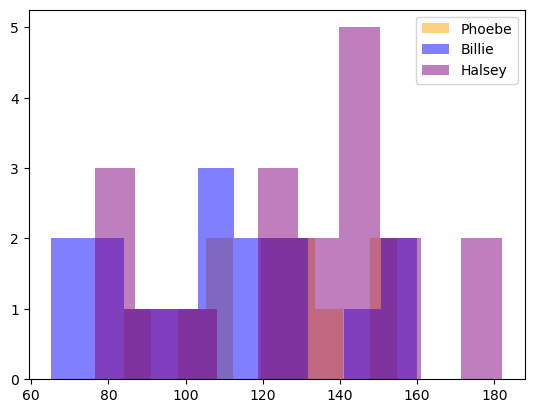

In [15]:
audio_features = pd.concat([pb_df, be_df, h_df])
phoebe = audio_features[audio_features['album'] == 'punisher']['tempo']
billie = audio_features[audio_features['album'] == 'happier than ever']['tempo']
halsey = audio_features[audio_features['album'] == 'hopeless fountain kingdom']['tempo']

fig1, ax1 = plt.subplots()
ax1.hist(phoebe, alpha = 0.5, color = 'orange', label='Phoebe')
ax1.hist(billie, alpha = 0.5, color = 'blue', label='Billie')
ax1.hist(halsey, alpha = 0.5, color = 'purple', label='Halsey')
ax1.legend()
plt.show

I think the above histogram is very interesting. By reflecting on the albums, the variation and low scores for both Billie and Phoebe's work makes sense. The albums have similar vibes, and the lower value and left skewed distributions match with that idea.

The distribution for Halsey's work makes sense as well. The work has some higher tempo music, and also has a lot of variation.

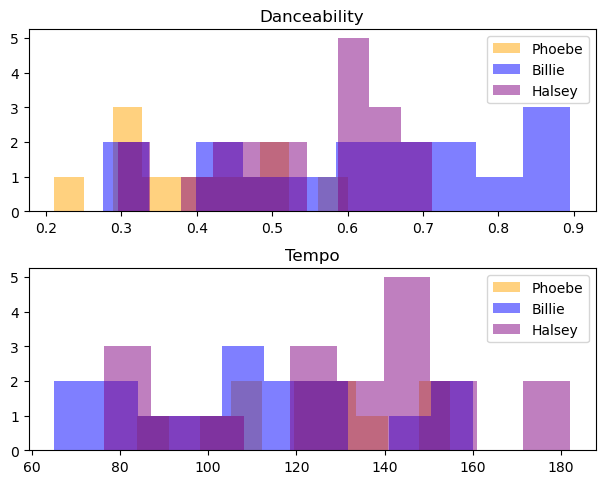

In [56]:
phoebe = audio_features[audio_features['album'] == 'punisher']['danceability']
billie = audio_features[audio_features['album'] == 'happier than ever']['danceability']
halsey = audio_features[audio_features['album'] == 'hopeless fountain kingdom']['danceability']

fig, ax = plt.subplots(2)
fig.tight_layout(h_pad=2.0)

ax[0].hist(phoebe, alpha = 0.5, color = 'orange', label='Phoebe')
ax[0].hist(billie, alpha = 0.5, color = 'blue', label='Billie')
ax[0].hist(halsey, alpha = 0.5, color = 'purple', label='Halsey')
ax[0].legend()
ax[0].set_title('Danceability')

phoebe = audio_features[audio_features['album'] == 'punisher']['tempo']
billie = audio_features[audio_features['album'] == 'happier than ever']['tempo']
halsey = audio_features[audio_features['album'] == 'hopeless fountain kingdom']['tempo']

ax[1].hist(phoebe, alpha = 0.5, color = 'orange', label='Phoebe')
ax[1].hist(billie, alpha = 0.5, color = 'blue', label='Billie')
ax[1].hist(halsey, alpha = 0.5, color = 'purple', label='Halsey')
ax[1].legend()
ax[1].set_title('Tempo')

plt.show()

The above histograms are interesting but not surprising. When thinking about the different albums, I would typically group Billie Eilish and Phoebe Bridgers together, and group Halsey with more exciting or danceable artists. The danceability histogram shows that Halsey has a large grouping of danceable songs around 0.6-0.7. Where the other artists are more distributed across the entire scale. The tempo reflects a similar perspective as the danceability histogram, where Halsey is typically more upbeat, but Billie and Phoebe have slower but intriguing songs.

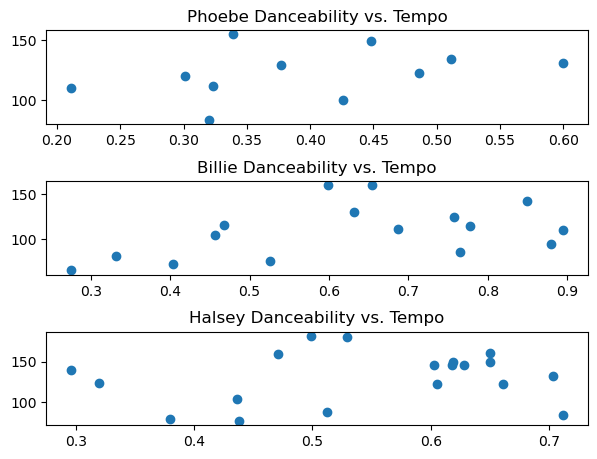

In [17]:
phoebe_dance = audio_features[audio_features['album'] == 'punisher']['danceability']
phoebe_tempo = audio_features[audio_features['album'] == 'punisher']['tempo']
billie_dance = audio_features[audio_features['album'] == 'happier than ever']['danceability']
billie_tempo = audio_features[audio_features['album'] == 'happier than ever']['tempo']
halsey_dance = audio_features[audio_features['album'] == 'hopeless fountain kingdom']['danceability']
halsey_tempo = audio_features[audio_features['album'] == 'hopeless fountain kingdom']['tempo']

fig, ax = plt.subplots(3)
fig.tight_layout(pad=2.0)

ax[0].scatter(phoebe_dance, phoebe_tempo)
ax[0].set_title('Phoebe Danceability vs. Tempo')

ax[1].scatter(billie_dance, billie_tempo)
ax[1].set_title('Billie Danceability vs. Tempo')

ax[2].scatter(halsey_dance, halsey_tempo)
ax[2].set_title('Halsey Danceability vs. Tempo')

plt.show()

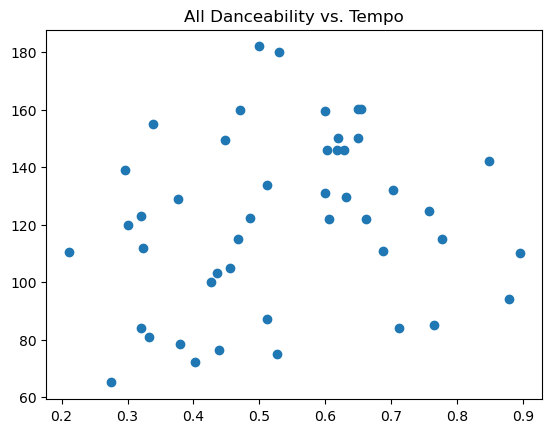

In [18]:
fig, ax = plt.subplots()

ax.scatter(audio_features['danceability'], audio_features['tempo'])
ax.set_title('All Danceability vs. Tempo')

plt.show()

The plot is similar to the three separate plots above. There does not seem to be a relationship between tempo and danceability. An easy way to differentiate the albums is to set the color attribute.

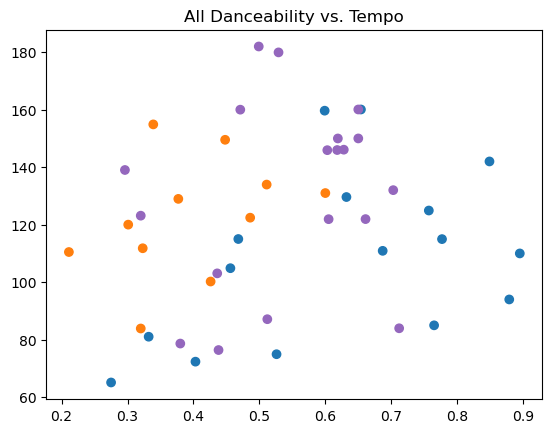

In [60]:
colors = {'punisher':'tab:orange', 'happier than ever':'tab:blue', 'hopeless fountain kingdom':'tab:purple'}

fig, ax = plt.subplots()
ax.scatter(audio_features['danceability'], audio_features['tempo'], c=audio_features['album'].map(colors))
ax.set_title('All Danceability vs. Tempo')

plt.show()

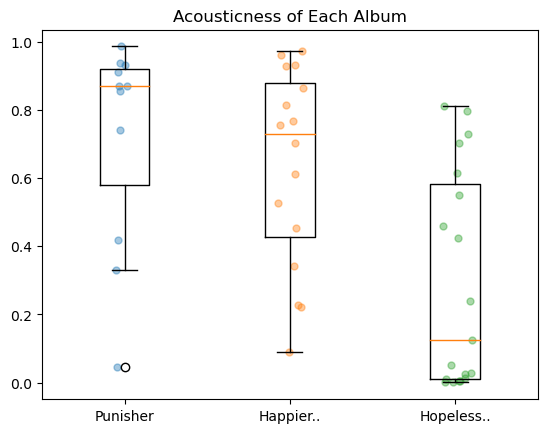

In [27]:
import numpy as np

fig, ax = plt.subplots()

pb_val = audio_features[audio_features['album'] == 'punisher']['acousticness']
be_val = audio_features[audio_features['album'] == 'happier than ever']['acousticness']
h_val = audio_features[audio_features['album'] == 'hopeless fountain kingdom']['acousticness']
pb_x = [1] * len(pb_val)
be_x = [2] * len(be_val)
h_x = [3] * len(h_val)
pb_x_jitter = np.random.uniform(-0.10, .10, len(pb_x))
be_x_jitter = np.random.uniform(-0.10, .10, len(be_x))
h_x_jitter = np.random.uniform(-0.10, .10, len(h_x))
ax.scatter(pb_x + pb_x_jitter, pb_val, alpha = 0.4, s = 25)
ax.scatter(be_x + be_x_jitter, be_val, alpha = 0.4, s = 25)
ax.scatter(h_x + h_x_jitter, h_val, alpha = 0.4, s = 25)
ax.boxplot([pb_val, be_val, h_val])
ax.set_xticks([1,2,3], ['Punisher', 'Happier..', "Hopeless.."])
ax.set_title("Acousticness of Each Album")

plt.show()

The above plots are interesting but make sense. Halsey tends to have some songs that lean more toward rock or pop and the album is less acoustic overall. It also makes sense that Happier than Ever has a higher variation of values. I did not expect punisher to have such a large number of high values. When I think of acousticness, I tend to think of a folk-style guitar, but Spotify may have a broader definition that leads to these higher confidence levels.

In [48]:
from scipy.stats import ttest_ind

ttest = ttest_ind(pb_val, be_val)
print("Phoebe vs Billie: \n T-stat : {}\n P-val : {} \n".format(ttest.statistic, ttest.pvalue))

ttest = ttest_ind(h_val, be_val)
print("Halsey vs Billie: \n T-stat : {}\n P-val : {} \n".format(ttest.statistic, ttest.pvalue))

ttest = ttest_ind(h_val, pb_val)
print("Halsey vs Phoebe: \n T-stat : {}\n P-val : {} \n".format(ttest.statistic, ttest.pvalue))

Phoebe vs Billie: 
 T-stat : 0.7026880802944534
 P-val : 0.48874223949914 

Halsey vs Billie: 
 T-stat : -3.2794295745070534
 P-val : 0.0024570065245957964 

Halsey vs Phoebe: 
 T-stat : -3.5469909802792112
 P-val : 0.0013948190057694837 



The above t-statistics and p-values reveal a similar insight to the one provided by the boxplot above. This is that the works by Phoebe and Billie are more similar to one another than they are to Halsey in regards to acousticness. The first p-value is not significant, and this means that there is not enough evidence to claim that the works from Phoebe and Billie do not have the same levels of acousticness. The second and third p-values indicate that there is enough evidence to claim that the work from Halsey has a different level of acousticness from Phoebe and Billie.